   # Project children's welfare
![фото студентов Хогвартса](https://www.intex-press.by/wp-content/uploads/2021/02/2ddec445aed035c0ab1eb9453416543d-e1614438339742.jpg)
## Суть данного проекта:
### Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. 

Это можно осуществить с помощью будущей модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.
Для этого, в свою очередь, необходимо определиться с параметрами будущей модели, **предварительно проведя разведывательный анализ данных и составив отчёт по его результатам.**  

### Определим, что нам предстоит:
    
  - Провести первичную обработку данных
  - Посмотреть на распределение признака для числовых переменных, поискать есть ли выбросы (устранить, при необходимости)
  - Найти уникальные значения среди номинативных переменных. преобразовать данные в нужную форму, если понадобится
  - Провести корреляционный анализ количественных переменных, отобрать некоррельируемые переменные
  - Поровести анализ номинативных переменных и устраните те, которые не влияют на предсказываемую величину "score"
  - Сформулировать выводы относительно качества данных и тех переменных, которые будут использоваться в дальнейшем построении модели


### Импортируем нужные для чтения и первичного анализа библиотеки: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

### Загрузим и прочитаем файл:

In [2]:
stud = pd.read_csv('stud_math.csv')

Перед началом работы, думаю,есть необходимость в том, чтобы выделить функции отдельно, которые могут быть задействованы неоднократно:    


In [3]:
def nan_finder(df, column):
    ''' 
    Функция для поиска пропущенных значений в колонке
    '''
    nan_count = df[column].isnull().sum().sum()
    return(nan_count)

def fill_na(df, column):
    '''
    Функция для заполнение пустых значений в df медианными
    '''
    median = df[column].median()
    return df[column].fillna(median)

**Посмотрим, как выглядят первые 10 строк нашего файла, а так же узнаем какие данные хранятся в файле и каким типом данных заполнены столбцы:**

In [4]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

***В датасете имеются: 13 числовых и 17 строковых столбцов. Пропуски присутсвуют во всех колонках, кроме трех первых.***

## || Первичный анализ данных ||

### **1.school**
Посмотрим, сколько школ участвуют в базе данных

In [27]:
print('Уникальных значений в этой колонке:', stud.school.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['school']))
pd.DataFrame(stud.school.value_counts())

Уникальных значений в этой колонке: 2
Пустых значений в колонке: 0


,school
GP,349
MS,46


*В нашем датасете присутствуют 2 аббревиатуры школ **GP** и **MS**  
Из первой 349 учеников,а из второй 46. Пустых значений в этой колонке нет.*

### **2.sex**
В данной колонке хранятся данные о поле учеников, проверим, есть ли пустые значения:

In [9]:
print('Уникальных значений в этой колонке:', stud.sex.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['sex']))
pd.DataFrame(stud.sex.value_counts())

Уникальных значений в этой колонке: 2
Пустых значений в колонке: 0


,sex
F,208
M,187


*Итак, пустых значений нет, всего 395 учеников из них: **208** девочек и **187** мальчиков*

### 3.age
Колонка содержит возраст учеников, рассмотрим ее на наличие пустых значений и заодно проверим распределение:

Уникальных значений в этой колонке: 8
Пустых значений в колонке:
0


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

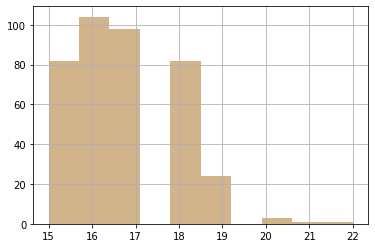

In [24]:
print('Уникальных значений в этой колонке:', stud.age.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['age']))
display(pd.DataFrame(stud.age.value_counts()))

stud.age.hist(color='tan')
stud.age.describe()

*Как видно, у этого признака распределение без аномалий, выбросов нет. Учеников старше 17 лет все меньше и меньше в нашем датасете. Думаю, в дальнейшем можно немного реорганизовать эту информацию. Пропусков нет!*

### 4.address
В этой колонке отмечены значения учеников живущих в городе или за его чертой. Поглядим что тут:

In [58]:
print('Уникальных значений в этой колонке:', stud.address.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['address']))
display(pd.DataFrame(stud.address.value_counts()))

stud.loc[:, ['address']].info()

Уникальных значений в этой колонке: 2
Пустых значений в колонке: 15


,address
U,291
R,83


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


*Как мы видим, есть **17 строк**, в которых не заполнены значения места проживания учеников, основная масса учеников живет в черте города, о чем свидетельствует 295 значений U, и в меньшинстве 83 значения R.*

### 5.famsize
Данная колонка отображает количество членов семьи учащегося ('LE3' <= 3, 'GT3' >3), проверим на пустые значение:

In [4]:
print('Уникальных значений в этой колонке:', stud.famsize.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['famsize']))
display(pd.DataFrame(stud.famsize.value_counts()))
stud.famsize.describe()

Уникальных значений в этой колонке: 2
Пустых значений в колонке: 27


,famsize
GT3,261
LE3,107


count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

*Как видно из анализа: семей, в которых более **3 членов семьи большинство - 261, и 107 семей, в которых не более 3х членов семьи.**   
Также имеетя 27 пустых значений.*

### 6.Pstatus
Данная колонка отображает данные о статусе совместного проживания родителей ученика ('T' - живут вместе 'A' - раздельно), оценим уникальные значения, проверим  пустые значения:

In [13]:
print('Уникальных значений в этой колонке:', stud.Pstatus.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['Pstatus']))
display(pd.DataFrame(stud.Pstatus.value_counts()))

Уникальных значений в этой колонке: 2
Пустых значений в колонке: 45


,Pstatus
T,314
A,36


*В итоге: подавляющее большинство учащихся проживают **совместно с родителями**, однако про **45** человек ничего неизвестно.*

### 7.Medu
Здесь отображены данные об образовании матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)   
Проверим колонку на пустые значения и распредление признака:

Уникальных значений в этой колонке: 5
Пустых значений в колонке: 3


,Medu
4.0,131
2.0,100
3.0,96
1.0,56
0.0,3


<AxesSubplot:>

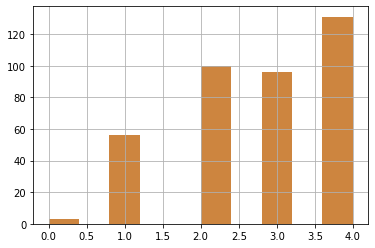

In [54]:
print('Уникальных значений в этой колонке:', stud.Medu.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['Medu']))
display(pd.DataFrame(stud.Medu.value_counts()))
stud.Medu.hist(color='peru')

*Распредление без аномалий, очень много мам с высшим образованием - это здорово, интересно впоследствии как это повлияет на уровень успеваемости учеников! Пустых значений всего 3 и это немного.*

### 8.Fedu
Здесь отображены данные об образовании отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
Проверим колонку на пустые значения и распредление признака:

Уникальных значений в этой колонке: 6
Пустых значений в колонке: 24


,Fedu
2.0,105
3.0,94
4.0,88
1.0,75
0.0,2
40.0,1


count    365.000000
mean       2.627397
std        2.241790
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

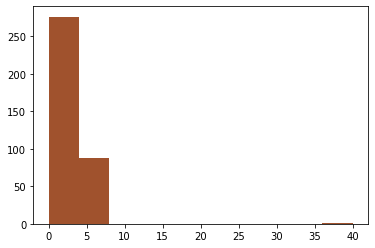

In [55]:
print('Уникальных значений в этой колонке:', stud.Fedu.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['Fedu']))
display(pd.DataFrame(stud.Fedu.value_counts()))
stud.Fedu.hist(color='sienna', grid=False)
stud.Fedu.describe()

*Как видно из анализа, в данной колонке большинство оценок уровня образовния отца учащегося сосредоточены между значениями 2.0 и 3.0, полагаю, что выбросы имеются, тем более, что есть какое-то максимальное зашкаливающее значение, которое не прописано в условии задания, проверим это ниже:*

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


<AxesSubplot:>

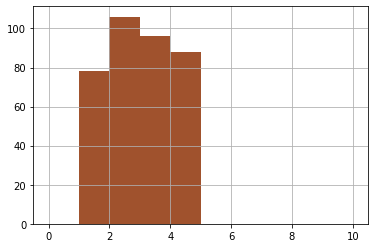

In [177]:
IQR = stud.Fedu.quantile(0.75) - stud.Fedu.quantile(0.25)
perc25 = stud.Fedu.quantile(0.25)
perc75 = stud.Fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.Fedu.loc[stud.Fedu.between(perc25 - 1.5*IQR,
                                perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10), label='IQR', color='sienna')

*Так и оказалось, выбросами были значения ниже 0.5 и выше 4.5 исходя из границ выброса, 
в нашем случае это 0 - нет образования, 1-4 классы и 4 - высшее. Однако, следует принять во внимание, что нижний уровень выброса обусловлен заданием, и не может считаться таковым.*
*А вот с одним человеком, у которого уровень образовния выше высшего (а высшее образование по заданию максимум, поскольку не классифицированы иные), то есть оценен как 40.0 - скорее всего, произошла ошибка, думаю, там отсутсвует точка и этот человек имеет высшее образование, и может быть отнесен в группу 4.0 (высшее образование)  
И в дополнении ко всему этому имеется 24 учащихся, об уровне образвония их отцов нам не извсетно.*

Попробуем заменить это значение и посомтреть как изменилась картина:
    

In [56]:
stud.Fedu = stud.Fedu.replace(40, 4)
display(stud.Fedu.describe())
display(pd.DataFrame(stud.Fedu.value_counts()))

count    365.000000
mean       2.528767
std        1.088082
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

,Fedu
2.0,105
3.0,94
4.0,89
1.0,75
0.0,2


*Теперь у нас **89 отцов** в датасете, у которых высшее образование! Точно также поменялись данные о максимальном значении, стандартном отклонении и среднем*

### 9.Mjob
Здесь отображены данные о сфере деятельности матери ученика ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое).   
Проверим колонку на уникальные и пустые значения:

Уникальных значений в этой колонке: 5
Пустых значений в колонке: 19


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


<AxesSubplot:>

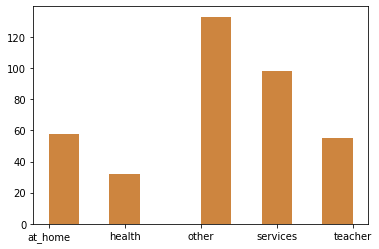

In [29]:
print('Уникальных значений в этой колонке:', stud.Mjob.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['Mjob']))
display(pd.DataFrame(stud.Mjob.value_counts()))
stud.Mjob.hist(color='peru', grid=False)

*Здесь мы можем наблюдать явное преобладание разнообразных профессий у мам наших учеников под именованием "другие", 
на втором месте чаще всего встречающихся профессий у мам учеников - госслужащие,
затем с большим отрывом идут домохозяйки и учителя, меньше всего мам задействовано в сфере здравоохранения (а жаль!)*

*Также мы имеем 19 мам сфера деятельности которых нам неизвестна и никак не классифицирована в нашем датасете*

### 10.Fjob
Здесь отображены данные о сфере деятельности отца ученика ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое).  
Проверим колонку на уникальные и пустые значения:

Уникальных значений в этой колонке: 5
Пустых значений в колонке: Fjob    36
dtype: int64


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


<AxesSubplot:>

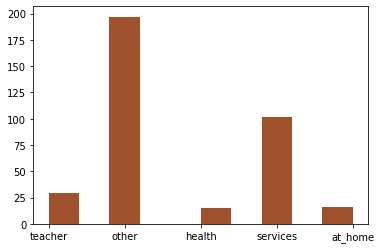

In [188]:
print('Уникальных значений в этой колонке:', stud.Fjob.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['Fjob']))
display(pd.DataFrame(stud.Fjob.value_counts()))
stud.Fjob.hist(color='sienna', grid=False)

*В данной колонке такая же тенденция относительно занятости отца в сфере **других** профессий, 
также с отрывом но на втором месте государственные служащие, у вот учителей среди отцов оказалось больше, 
чем не работающих  или занятых в сфере здравоохранения.  
Однако показатель неизвестных нам профессий среди отцов учеников намного больше, чем среди мам, он составляет 36 человек.*

### 11.reason
Здесь отображены данные о причинах выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)  
Проверим какие здесь значения уникальные и имеются ли пустые?

Уникальных значений в этой колонке: 4
Пустых значений в колонке: 17


,reason
course,137
home,104
reputation,103
other,34


<AxesSubplot:>

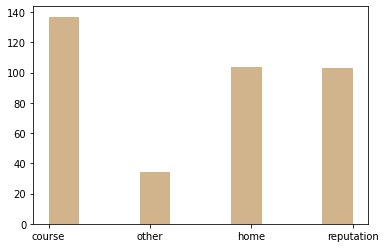

In [30]:
print('Уникальных значений в этой колонке:', stud.reason.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['reason']))
display(pd.DataFrame(stud.reason.value_counts()))
stud.reason.hist(color='tan', grid=False)

*Для большинства учеников очень важна оказалась **образовательная программа**, 
далее примерно одинаковое значение имеют **близость к дому** (все-таки важнее) и **репутация школы**, но также есть и иные критерии, как и 17 пустых значений.*

### 12.guardian
Здесь запечатлены данные о том, кто является текущим опекуном учащегося ('mother' - мать, 'father' - отец, 'other' - другое)

Посмотрим на эти данные:

In [31]:
print('Уникальных значений в этой колонке:', stud.guardian.nunique())
print('Пустых значений в колонке:', nan_finder(stud, ['guardian']))
display(pd.DataFrame(stud.guardian.value_counts()))

Уникальных значений в этой колонке: 3
Пустых значений в колонке: 31


,guardian
mother,250
father,86
other,28


*Путых значений - 36, и подавляющее большинство опекунов это мамы.*

### 13.traveltime
Здесь отображено время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.), это числовой столбец, посмотрим сколько в нем пропусков и какое у него распределение:

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Пустых значений в колонке: 28


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<AxesSubplot:>

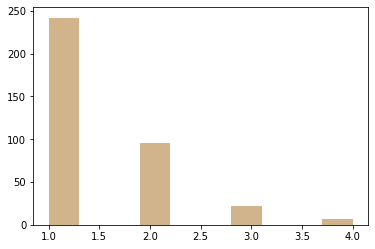

In [10]:
display(stud.traveltime.describe())
print('Пустых значений в колонке:', nan_finder(stud, ['traveltime']))
display(pd.DataFrame(stud.traveltime.value_counts()))
stud.traveltime.hist(color='tan', grid=False)

*В данной колонке больше половины детей тратят на дорогу до школы **менее 15 минут**, 
из оставшейся части б**О**льшая часть тратит **от 15 до 30 минут**, **22** человека тратят от **получаса до часа**, 
и **7** человек, тратят **свыше часа** на дорогу,
а также **28** неизвестное количество времени.*

### 14.studytime
Здесь отображено время, затраченное на учёбу помимо школы (в неделю: 1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов), посмотрим есть ли пустые значения, выбросы и оценим его распредление

Пустых значений в колонке: 7


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


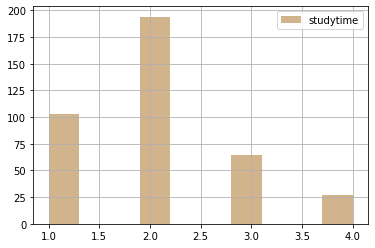

In [11]:
print('Пустых значений в колонке:', nan_finder(stud, ['studytime']))
stud.studytime.hist(color='tan', legend=True)
display(pd.DataFrame(stud.studytime.value_counts()))

*Большинство детей тратят время на учебу помимо школы **от 2-5 часов** и **менее 2х часов**, лишь меньшая их часть тратит **более 5 часов на уроки**, интересно, как это будет связано с дальнейшей успеваемостью?* Распределение без аномалий, выбросы отстутствуют.

### 15.failures
Количество внеучебных неудач (n, если 1<=n<=3, иначе 0), посмотрим есть ли пустые значения, выбросы и оценим его распредление:

Пустых значений в колонке: 22


,failures
0.0,293
1.0,49
2.0,16
3.0,15


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

<AxesSubplot:>

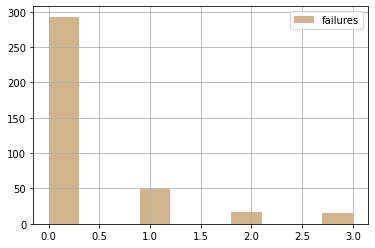

In [44]:
print('Пустых значений в колонке:', nan_finder(stud, ['failures']))
display(pd.DataFrame(stud.failures.value_counts()))
display(stud.failures.describe())
stud.failures.hist(color='tan', legend=True)

*Подавляющее большинство детей не имеют внеучебных неудач,  в колонке имеются 22 пустых значения. Раcпределение без аномалий и выбросов нет. Однако, все же интересно как эта колонка может вляить на оценки по госэкзамену, увидим впоследствии.*

### 16.schoolsup
Дополнительная образовательная поддержка, (yes или no), очень интересный параметр, особенно его взаимосвязь с другими категориями данных, проверим как у детей с этим обстоят дела:

In [33]:
print('Пустых значений в колонке:', nan_finder(stud, ['schoolsup']))
display(pd.DataFrame(stud.schoolsup.value_counts()))

Пустых значений в колонке: 9


,schoolsup
no,335
yes,51


*Этот параметр показывает, что лишь **51 человек** из **395** получает образовательную поддержку, **а остальные нет**, исключая только **9 человек**, про которых данные отсутствуют.*

### 17.famsup
Семейная образовательная поддержка, (yes или no), проверим как у детей с этим обстоят дела:

In [46]:
print('Пустых значений в колонке:', nan_finder(stud, ['famsup']))
display(pd.DataFrame(stud.famsup.value_counts()))

Пустых значений в колонке: 39


,famsup
yes,219
no,137


*А вот здесь видно, что большинство детей получают семейную образовательную поддержку, нежели нет. Пропусков 39.*

### 18.paid
Эта графа отображает наличие дополнительных платных занятий по математике у наших учеников (в формате: yes или no)


In [47]:
print('Пустых значений в колонке:', nan_finder(stud, ['paid']))
display(pd.DataFrame(stud.paid.value_counts()))

Пустых значений в колонке: 40


,paid
no,200
yes,155


### 19.activities
Дополнительные внеучебные занятия (в формате: yes или no)

In [50]:
print('Пустых значений в колонке:', nan_finder(stud, ['activities']))
display(pd.DataFrame(stud.activities.value_counts()))

Пустых значений в колонке: 14


,activities
yes,195
no,186


*В данном колонке данные разделились почти поровну, однако пустые значения имеются в размере 14 штук.*

### 20.nursery
Ходил ли ребенок в детский сад  
Рассмотрим подетальнее:

In [49]:
print('Пустых значений в колонке:', nan_finder(stud, ['nursery']))
display(pd.DataFrame(stud.nursery.value_counts()))

Пустых значений в колонке: 16


,nursery
yes,300
no,79


*Ну чтож, подавляющее большинство детей посещало детский сад. Неизвестны лишь даные о **16ти** учениках*

### 21.higher
В данной графе отражено желание учеников в будущем получить высшее образование (в формате: yes или no). Интересно, какая тенденция в этом датасете?

In [51]:
print('Пустых значений в колонке:', nan_finder(stud, ['higher']))
display(pd.DataFrame(stud.higher.value_counts()))

Пустых значений в колонке: 20


,higher
yes,356
no,19


*О мнении **20** учеников на тему получения высшего образования в будущем нам неизвестно ничего, а вот **356 учеников хотят** получить высшее образование, это замечательно!*

![Фото_апплодисментов](https://www.cap-that.com/harrypotter/02/images/harrypotter02_7080.jpg)

### 22.internet
Проверим у скольких детей есть интернет в доме:

In [52]:
print('Пустых значений в колонке:', nan_finder(stud, ['internet']))
display(pd.DataFrame(stud.internet.value_counts()))

Пустых значений в колонке: 34


,internet
yes,305
no,56


### 23.romantic
Состоят ли ученики в романтических отношениях или нет:

In [53]:
print('Пустых значений в колонке:', nan_finder(stud, ['romantic']))
display(pd.DataFrame(stud.romantic.value_counts()))

Пустых значений в колонке: 31


,romantic
no,240
yes,124


*Всего **124 ученика** состоят в романтических отношениях и в два раза больше не состоят, о **31** респонденте в этой колонке ничего не известно.*

### 24.famrel
Семейные взаимоотношения, насколько они хороши или плохи. Ниже оченим "климат" в семье по 5 бальной шкале, где максимальная оценка 5:

In [58]:
print('Пустых значений в колонке:', nan_finder(stud, ['famrel']))
display(stud.famrel.describe())
display(pd.DataFrame(stud.famrel.value_counts()))

Пустых значений в колонке: 27


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


*Виден существенный разброс в оценке взаимоотношений, также имеется отрицательно значение, скорее всего, если посчитать IQR, то это значение превратится в выброс. Посмотрим как это выглядит на графике:*

<AxesSubplot:>

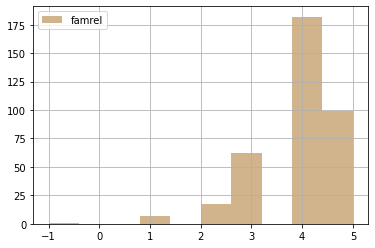

In [256]:
stud.famrel.hist(color='tan', legend=True)

Ради интереса, посчитаем IQR и границы выбросов:

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


<AxesSubplot:>

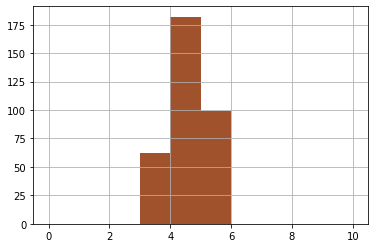

In [257]:
IQR = stud.famrel.quantile(0.75) - stud.famrel.quantile(0.25)
perc25 = stud.famrel.quantile(0.25)
perc75 = stud.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.famrel.loc[stud.famrel.between(perc25 - 1.5*IQR,
                                    perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10), label='IQR', color='sienna')

*Как мы можем видеть, начиная с оценки 2 все значения являются выбросами, но принимая во внимания тот факт, что указаные в задании значения оценки не могут быть выбросами, так как они являются параметрами оценки, полагаю, что можно внести изменения в отричцательный параметр и отнести его к 1, скорее всего **-1** это ошибка, а если и так, то это значение более ближе к 1, чем к 4. Средняя оценка 4, но и тех у кого замечательные отношения в семье - тоже предостаточно! Пустые значения - 27 человек с неизвестными отношениями в семье. Интересно, что у них с упеваемостью?*

Тогда, стоит заменить это отрицательное значение на такое же, но положительное, которое есть у нас в описании колонки как критерий оценки:

In [66]:
stud.loc[(stud.famrel < 0), 'famrel'] = 1
display(stud.famrel.describe())
display(pd.DataFrame(stud.famrel.value_counts()))

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


*Ну вот, таким образом это отрицательное значение было заменено и теперь фиксируется как 1, то есть очень плохой показатель в отношениях в семье.*

### 25.freetime
Свободное время после школы по 5ти бальной шкале, где 5 - очень много, рассмотрим данные:

In [59]:
print('Пустых значений в колонке:', nan_finder(stud, ['freetime']))
display(pd.DataFrame(stud.freetime.value_counts()))

Пустых значений в колонке: 11


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


*Распределение таково, что свободного времени - умеренное количество у большинства детей, а вот слишком много или слишком мало у значительного меньшинства.*

### 26.goout
Проведение времени с друзьями (от 1 - очень мало до 5 - очень много)


In [60]:
print('Пустых значений в колонке:', nan_finder(stud, ['goout']))
display(pd.DataFrame(stud.goout.value_counts()))

Пустых значений в колонке: 8


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


*В среднем, дети проводят с друзьями **умеренное** количество времени (золотая середина это хорошо!). Выбросов нет, а вот пустые значения имеются в количестве **8** штук.*

### 27.health
Оценим текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо):

In [61]:
print('Пустых значений в колонке:', nan_finder(stud, ['health']))
display(pd.DataFrame(stud.health.value_counts()))

Пустых значений в колонке: 15


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


*Не так уж много детей в датасете с плохим здоровьем - и это радует, в основном все в порядке. Выбросов нет, а вот пустых значений 15.*

### 28.absences
Количество пропущенных занятий:

Пустых значений в колонке: 12


,absences
0.0,111
1.0,3
2.0,60
3.0,8
4.0,55
5.0,5
6.0,31
7.0,6
8.0,21
9.0,3


count    383.000000
mean       5.741514
std        8.068329
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

<AxesSubplot:>

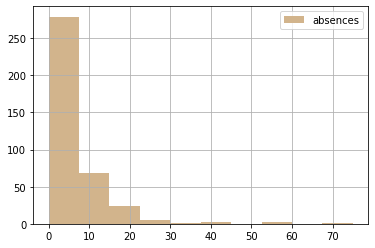

In [29]:
print('Пустых значений в колонке:', nan_finder(stud, ['absences']))
display(pd.DataFrame(stud.absences.value_counts().sort_index()))
display(stud.absences.describe())
stud.absences.hist(color='tan', legend=True)

*Ого! А есть ученики, которые "проспали все", к счастью, их не много, но все же, данный результат я бы отнесла к аномалии, что впоследствии может навердить результатам работы модели, предпочту заменить их на медианные значения. Пропуски в данном случае можно тоже заменить на медианы. Посмотрим, какое количество пропущенных занятий у наших учеников встречается чаще 10 раз:*

In [28]:
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.absences.value_counts() > 10).sum())
over_10 = pd.DataFrame(stud['absences'].value_counts().loc[lambda x: x > 10])
display(over_10, over_10.sum())

Значений, встретившихся в столбце более 10 раз: 8


,absences
0.0,111
2.0,60
4.0,55
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12


absences    319
dtype: int64

*Эта выборка отражает данные, которые встречаются в колонке **более 10 раз** (а это, выше среднего значения), исходя из анализа, можно сделать выводы, что не так-то уж и много пропусков у детей. Таким образом: **317 учеников имеют не более 14 пропущенных занятий**, большая часть из которых имеет не более **2х** пропусков! Неизвестных нам значений всего 12*

***Итак, заменим пропуски и аномальные значения на медианы:***

In [30]:
stud.absences = stud.absences.apply(lambda x: stud.absences.median() if x > 100 else x)
absences_fillna = fill_na(stud, ['absences'])

#Проверяем
display(absences_fillna.value_counts().loc[lambda x: x > 10])
display(absences_fillna.describe())

absences
0.0         111
4.0          67
2.0          60
6.0          31
8.0          21
10.0         17
14.0         12
12.0         12
dtype: int64

,absences
count,395.000000
mean,5.688608
std,7.950146
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,75.000000


***Таким образом, медианных значений равных 4.0 у нас стало 67, с учетом двух замен аномальных значений и 12 пропусков, а было 53 значений равных медиане.***

##### 29.score
Баллы по госэкзамену (математика):

Пустых значений в колонке: 6


,score
0.0,37
20.0,1
25.0,7
30.0,15
35.0,9
40.0,31
45.0,27
50.0,54
55.0,46
60.0,31


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<AxesSubplot:>

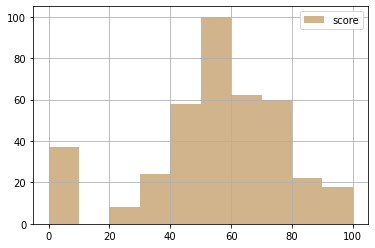

In [31]:
print('Пустых значений в колонке:', nan_finder(stud, ['score']))
display(pd.DataFrame(stud.score.value_counts().sort_index()))
display(stud.score.describe())
stud.score.hist(color='tan', legend=True)

Пропущенных значений - **6**, медиана **55.0**, средняя оценка за госэкзамен - **52,3 балла**. Уточним, какой уровень оценок встретился в колонке чаще **10 раз:**

In [80]:
pd.DataFrame(stud['score'].value_counts().loc[lambda x: x > 10])

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


*Итак, получается, что высший балл среди наших учеников не попал в 10ку часто встречающихся оценок (эх, жаль), однако 90 баллов попали - и это замечательно! Самые часто встречающиеся значения в колонке - это 50.0 баллов, что ниже среднего и медианы и 55.0, что соответствует срединному значению в колонке, и как ни прискорбно, тройку лидеров по часто встречающимся оценкам за госэкзамен закрывает оценка 0.0 баллов. Этот факт показался мне занятным, видимо были иные причины помимо полного отсутсвия заний у ученика, чтобы поставить 0.0. Дальнейшие значения более или менее высокие все же.*  

***Принимая во внимание тот факт, что в условиях задания указано, что целевая переменная не должна иметь пропусков, заменить примерными значениями или другимим не точными их нельзя, спросить у респондентов ответы я не могу и связатья с тем, кто составлял df тоже нет возможности, то принимаю решение удалить эти пропуски, дабы получить более чистые значения впоследствии. Благо, их не много.***

In [36]:
stud.dropna(subset=['score'], inplace=True)
print('Пустых значений в колонке:', nan_finder(stud, ['score']))

Пустых значений в колонке: 0


### Перед тем, как приступим к дальнейшему анализу, проведем небольшую проверку:

In [87]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

***Вижу еще один столбец 'studytime, granular', который был пропущен, рассмотрим его подробнее:***

![](https://www.cap-that.com/harrypotter/01/images/harrypotter01_0286.jpg)

### studytime, granular
Для удобства переименуем его на более удобный вид:

In [4]:
stud.rename(columns = {'studytime, granular' : 'granular_studytime'}, inplace = True)
stud


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular_studytime,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Уже выглядит лучше! Идем дальше, там лежат отрицательные числовые значения, посмотрим как они распределяются и есть ли пропуски:

Пустых значений в колонке: 7


count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular_studytime, dtype: float64

,granular_studytime
-6.0,194
-3.0,103
-9.0,64
-12.0,27


<AxesSubplot:>

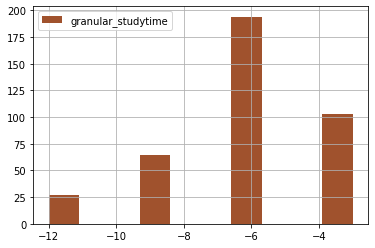

In [5]:
print('Пустых значений в колонке:', nan_finder(stud, ['granular_studytime']))
display(stud.granular_studytime.describe())
display(pd.DataFrame(stud.granular_studytime.value_counts()))
stud.granular_studytime.hist(color='sienna', legend=True)

*Пропуски есть - 7 значений пропущено, распределение данных без аномалий. Визуально напоминает похожую даже по названию колонку - studytime, только в реверсивном варианте.*

### Промежуточные выводы:
- В целом, в датасете не много пропусков, но удалять их непозволительно на мой взгляд (кроме score) 
- В некоторых столбцах наблюдается существенное преобладание одних признаков над другими (например: school, Pstatus, famrel и higher)
- В колонке age можно произвести некоторые изменения: учеников старше 18лет вывести в дополнительную переменную
- В колонках Fedu, famrel есть аномальные значения противоречащие условиям задания
- В колонке absences имеются аномальные значения, которые могут сильно повлиять на работу модели (были заменены на медианные)
- Имеется дополнительная колонка "studytime, granular", о которой не указано в условиях задания, все значения в ней отрицательные и в виде графика напоминают реверсивную версию похожей по названию колонки "studytime"
- Целевая колонка score содержит пропуски (были удалены)

## Корреляционный анализ

Выясним, какие числовые столбцы коррелируют с баллами по госэкзамену учеников (колонка score). Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.  
**Посмотрим на матрицу корреляции числовых переменных (age, absences и score):**

In [40]:
s_num = ['age', 'absences', 'score']

,age,absences,score
age,1.000000,0.169071,-0.155726
absences,0.169071,1.000000,0.030943
score,-0.155726,0.030943,1.000000


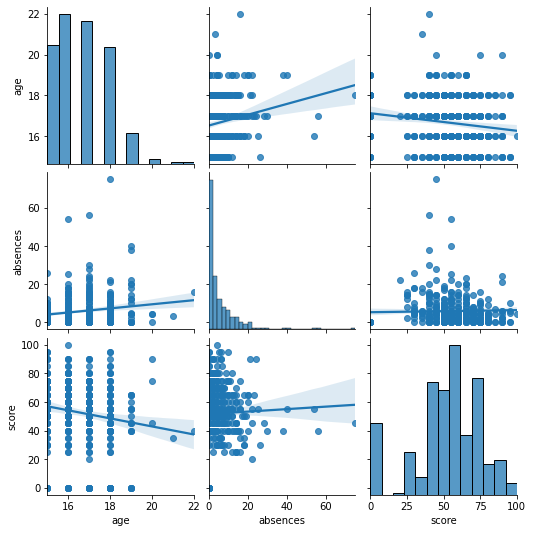

In [42]:
sns.pairplot(stud[s_num ], kind='reg')
stud[s_num ].corr()

Итак, линейная связь между absences и score не значительная, возможно есть нелинейная связь и это тоже необходимо проверить:

<AxesSubplot:xlabel='absences', ylabel='score'>

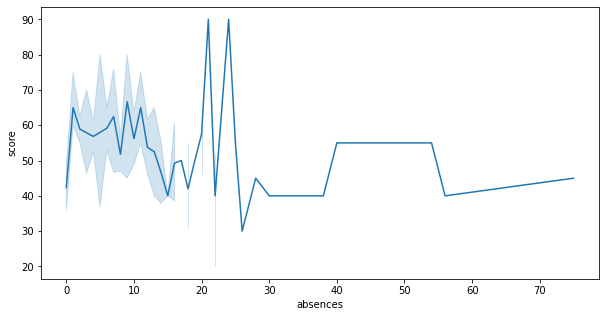

In [44]:
plt.figure(figsize=(10,5))
sns.lineplot(data=stud, x='absences', y='score')

***Для будущей модели данный  признак имеет довольно низкую значимость.***

#### Посмотрим на матрицу корреляции количественных и смешанных переменных:

In [45]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.132182,0.073146,-0.018227,0.205919,0.018227,0.060414,0.016099,0.121115,-0.068103,0.169071,-0.155726
Medu,-0.146736,1.000000,0.270754,-0.165838,0.081032,-0.240319,-0.081032,0.000602,0.038265,0.072320,-0.048331,0.096707,0.213349
Fedu,-0.132182,0.270754,1.000000,0.038990,0.059618,-0.150023,-0.059618,0.045665,-0.062377,-0.019312,0.024861,0.008651,0.078573
traveltime,0.073146,-0.165838,0.038990,1.000000,-0.105910,0.049738,0.105910,-0.027395,-0.026299,0.032629,-0.011724,-0.013422,-0.070559
studytime,-0.018227,0.081032,0.059618,-0.105910,1.000000,-0.181947,-1.000000,0.046249,-0.125066,-0.053831,-0.079180,-0.065745,0.115741
failures,0.205919,-0.240319,-0.150023,0.049738,-0.181947,1.000000,0.181947,-0.034836,0.091608,0.107747,0.088013,0.066424,-0.344338
"studytime, granular",0.018227,-0.081032,-0.059618,0.105910,-1.000000,0.181947,1.000000,-0.046249,0.125066,0.053831,0.079180,0.065745,-0.115741
famrel,0.060414,0.000602,0.045665,-0.027395,0.046249,-0.034836,-0.046249,1.000000,0.174193,0.076387,0.080089,-0.056377,0.057112
freetime,0.016099,0.038265,-0.062377,-0.026299,-0.125066,0.091608,0.125066,0.174193,1.000000,0.296338,0.064315,-0.068985,0.019026
goout,0.121115,0.072320,-0.019312,0.032629,-0.053831,0.107747,0.053831,0.076387,0.296338,1.000000,-0.018026,0.038832,-0.129685


**Для быстрого и наглядного построения матрицы используем "тепловую карту" - heatmap из модуля seaborn:**

Text(0.5, 1.0, 'Корреляционная карта')

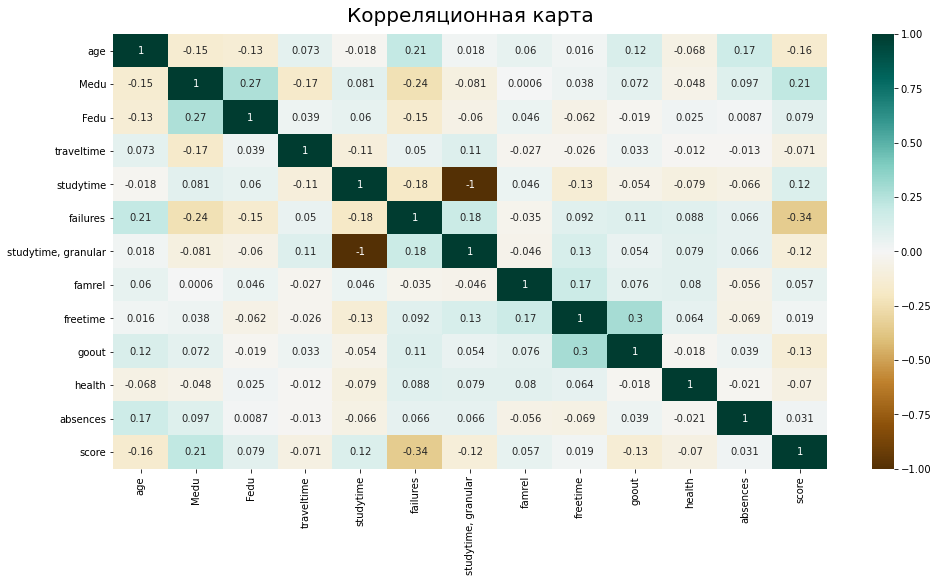

In [46]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(stud.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Корреляционная карта', fontdict={'fontsize': 20}, pad=12)

По данной карте можно выделить несколько низкокоррелирующих признаков: Fedu, traveltime, famrel, freetime, health, address.
В данной карте максимальная корреляция между Score и failures (количество внеучебных неудач), причем корреляция отрицательная, то есть чем больше неудач, тем ниже оценка на экзамене, а вот чем выше Medu (образование матери), тем лучше успеваемость у учеников по экзамену, хотя оба эти показателя не превышают уровень 0,3, также коррелируют между собой Fedu - Medu. А вот прогулы не портят результатов экзаменационных баллов, что удивительно.

Также видно, что колонки: granular studytime и studytime имеют обратную корреляцию равную -1, информацию дублируется, впоследствии можно удалить один из столбцов, к примеру тот, который не был указан в задании.

## Анализ номинативных переменных

Остались для рассмотрения эти переменные: school, sex, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic


In [50]:
def boxplot_view(column):
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

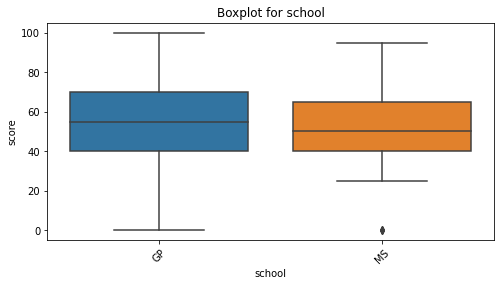

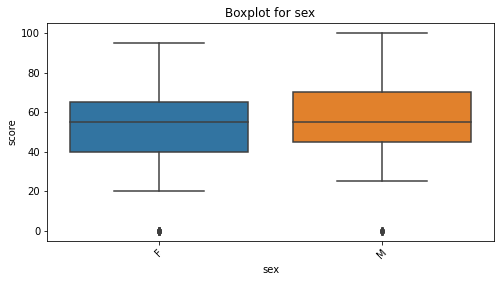

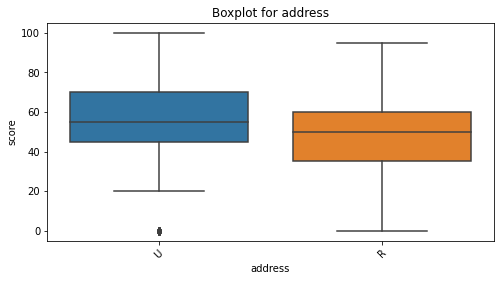

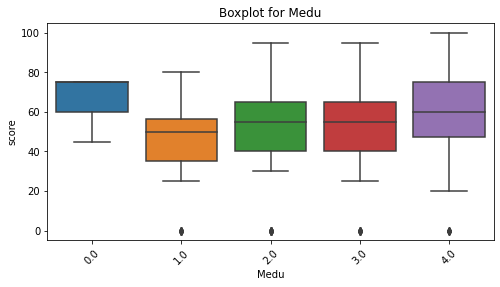

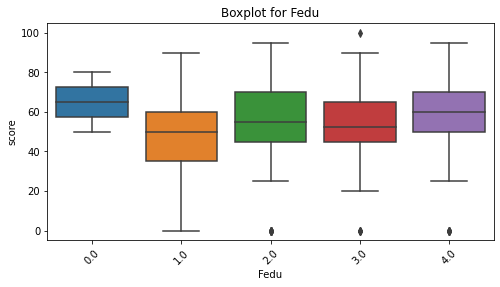

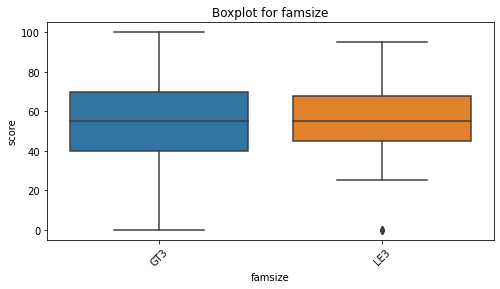

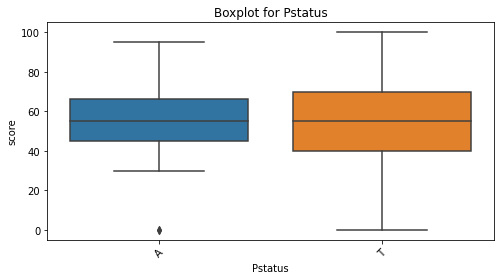

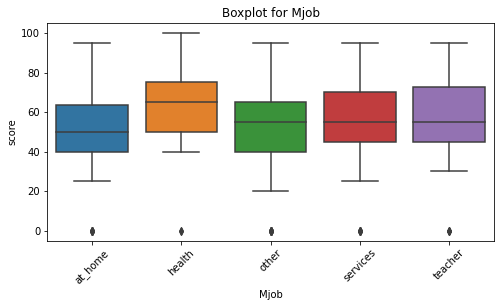

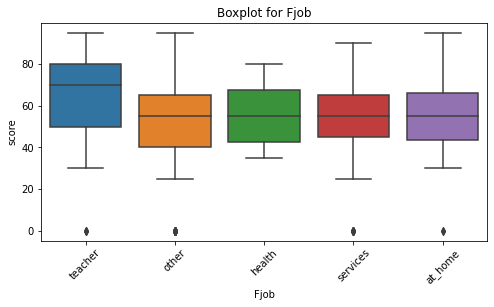

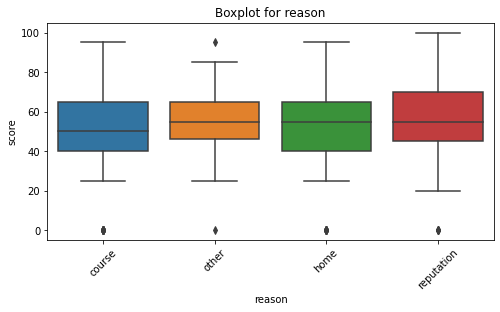

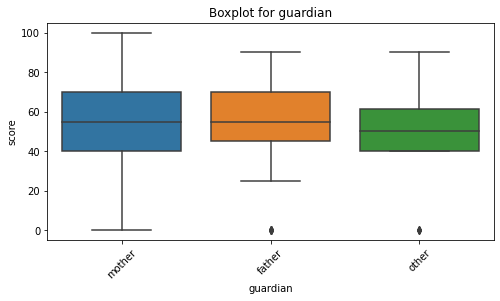

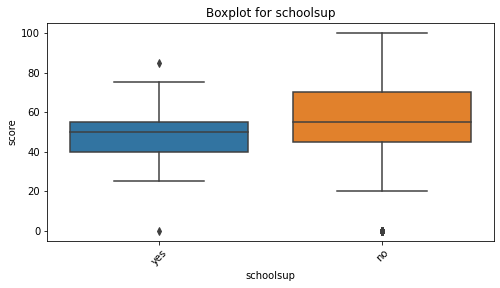

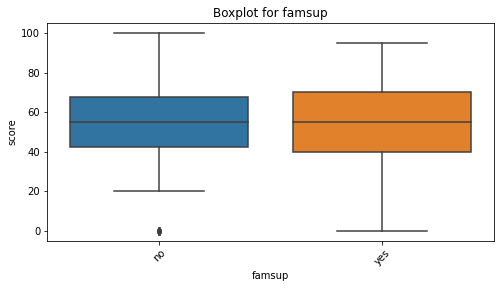

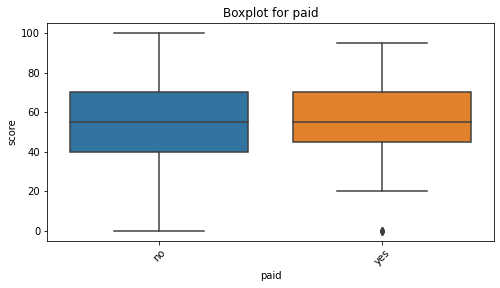

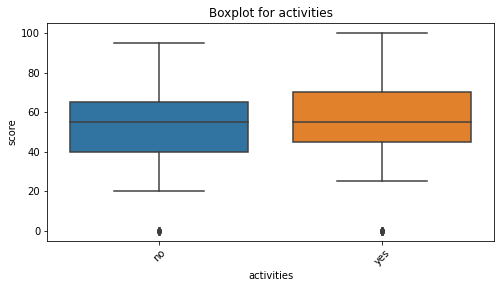

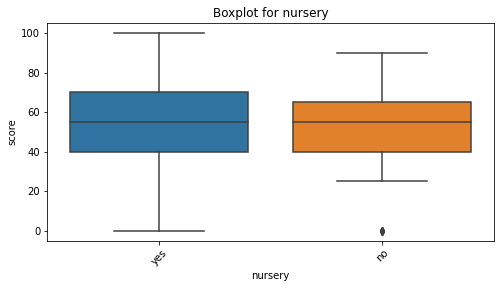

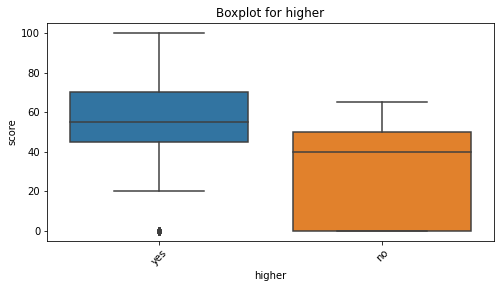

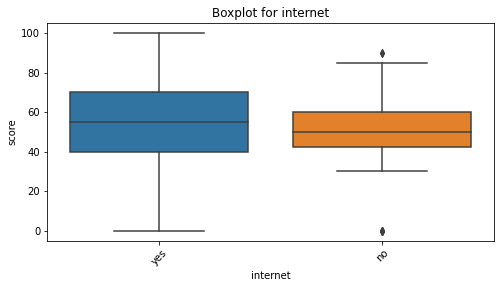

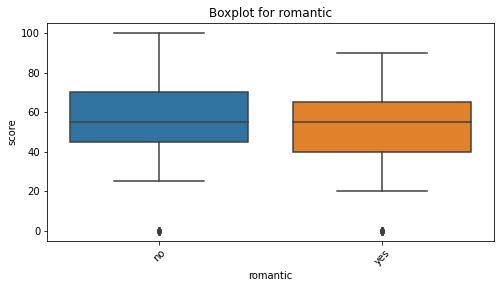

In [57]:
columns_n = ['school', 'sex', 'address', 'Medu', 'Fedu','famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic']
for col in columns_n:
    boxplot_view(col)

***Наиболее "заметные" колонки для будущей работы модели: sex, school, address, Medu, Fedu, Mjob, Fjob, schoolsup, higher***

## Итоговые выводы:
**В результате проведенного анализа EDA можно сделать следующие выводы относительно рассматриваемого датасета:**

**Данные представлены относительно чистые:**  

-Небольшое количество пропусков (приблизительно 10%), в первых трех колонках данные заполнены полностью  
-Были обнаружены всего два столбца: Fedu, famrel, в которых было по одному "ошибочному" значению, которые были заменены на предполагаемые в рамках критерий задания  
-В одной колонке (absences) находились два аномальных значения (свыше 200) и 12 пропусков, которые были заменены на медианные значения  

**Также, в ходе анализа было решено удалить пропуски в целевой переменной score**  

**В результате корреляционного анализа, анализа номинативных и смешанных признаков:**
-Зафиксирована высокая обратная корреляция между столбцами studytime studytime,granular(переимен: granular_studytime), впоследствии считаю возможным его удаление  
-Отмечена линейная зависимость между Score и failures, а также  Fedu - Medu и Medu - Score  
-По моему мнению следует исключить из последующей работы колонки с корреляцией ниже 0.1, поскольку это свидетельстует о низкой взаимосвязи этих факторов с целевой переменной
-Зафиксирована взаимосвязь данных признаков: school, address, goout, Medu, Fedu, Mjob, Fjob, schoolsup, higher

**В качестве подведения итога хотела бы отметить, что данные признаки я бы стала использовать для дальнейшей работы, как наиболее интересные и значимые: sex, age, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, higher, goout.**
    